In [4]:
!tree data

data
└── top_1000_pypi.jsonl

1 directory, 1 file


In [48]:
import json

top_pypi_packages = []
with open("data/top_1000_pypi.jsonl", "r") as f:
    for line in f:
        top_pypi_packages.append(json.loads(line))
top_pypi_packages[0].keys()

dict_keys(['rank', 'name', 'url', 'github', 'stars', 'pulls'])

In [43]:
import pandas as pd

top_pypi_packages_df = pd.DataFrame(top_prs)

In [66]:
top_githubs_df = top_prs_df.dropna(subset=["pulls"]).groupby("github", as_index=False)["pulls"].max()
print(top_githubs_df)
print(f"Total number of pull requests: {top_github_repos_df['pulls'].sum()}")

                                            github   pulls
0            http://github.com/ActiveState/appdirs   189.0
1             http://github.com/ahupp/python-magic   335.0
2           http://github.com/alexmojaki/pure_eval    15.0
3                 http://github.com/celery/py-amqp   434.0
4            http://github.com/fonttools/fonttools  3662.0
..                                             ...     ...
512      https://github.com/youknowone/methodtools    31.0
513         https://github.com/youknowone/wirerope    26.0
514  https://github.com/youtype/mypy_boto3_builder   317.0
515                 https://github.com/ypcrts/fqdn    46.0
516                https://github.com/zeromq/pyzmq  2039.0

[517 rows x 2 columns]
Total number of pull requests: 1117915.0


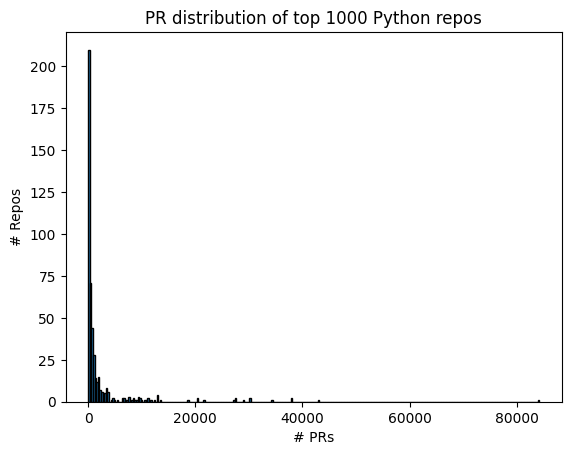

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram
filtered_df = top_githubs_df[top_githubs_df["pulls"] > 30]

plt.hist(filtered_df["pulls"], bins='auto', edgecolor='black')
plt.title('PR distribution of top 1000 Python repos')
plt.xlabel('# PRs')
plt.ylabel('# Repos')
plt.show()